#Step 1: Load and Explore the Dataset

In [10]:
import pandas as pd

# Load dataset
df = pd.read_csv("netflix_titles.csv")

# Preview data
df.head()
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


# Step 2: Clean the Data

In [11]:
#Incorrect Data Typ
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')

In [12]:
# Inplace Parameter
df['director'] = df['director'].fillna('Unknown')
df['cast'] = df['cast'].fillna('Unknown')

In [13]:
#  NaN vs NaT
import pandas as pd
df['date_added'] = df['date_added'].fillna(pd.Timestamp('2000-01-01'))

 Step 3: Exploratory Data Analysis (EDA)


# 1. Content Type Distribution

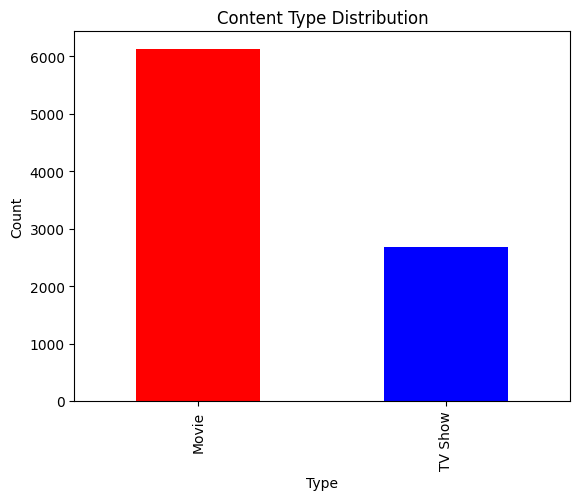

In [14]:
import matplotlib.pyplot as plt

df['type'].value_counts().plot(kind='bar', color=['red', 'blue'])
plt.title('Content Type Distribution')
plt.xlabel('Type')
plt.ylabel('Count')
plt.show()

# 2. Content Added Over the Years

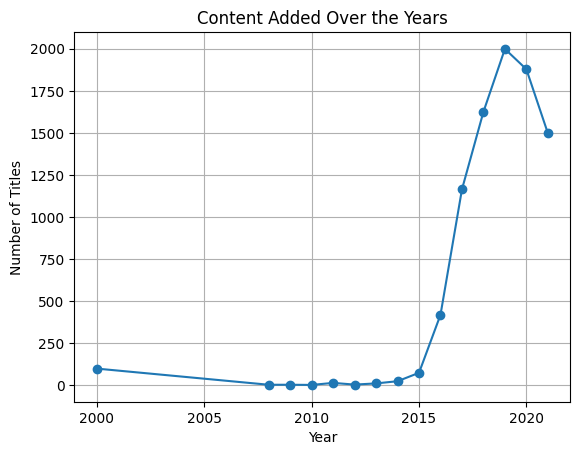

In [15]:
df['year_added'] = df['date_added'].dt.year
df['year_added'].value_counts().sort_index().plot(kind='line', marker='o')
plt.title('Content Added Over the Years')
plt.xlabel('Year')
plt.ylabel('Number of Titles')
plt.grid(True)
plt.show()

#  3. Top Countries by Content

C:\Users\akash\AppData\Local\Temp\ipykernel_10720\2356635968.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_countries.values, y=top_countries.index, palette='viridis' )


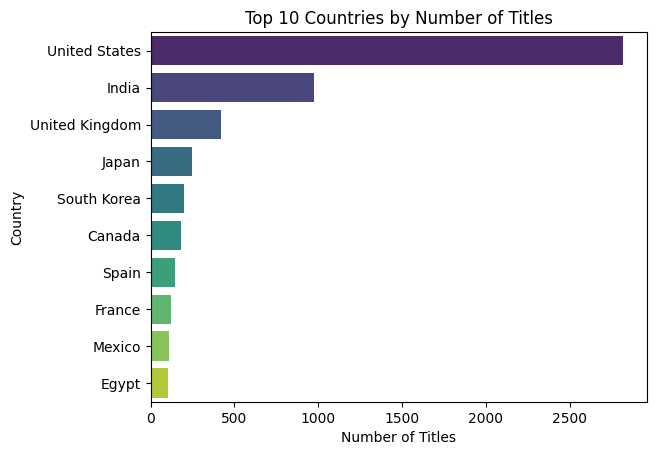

In [16]:
import seaborn as sns

top_countries = df['country'].value_counts().head(10)
sns.barplot(x=top_countries.values, y=top_countries.index, palette='viridis' )
plt.title('Top 10 Countries by Number of Titles')
plt.xlabel('Number of Titles')
plt.ylabel('Country')
plt.show()

# Step 4: Sentiment Analysis of Description

C:\Users\akash\AppData\Local\Temp\ipykernel_10720\2953865510.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='sentiment', palette='Set2')


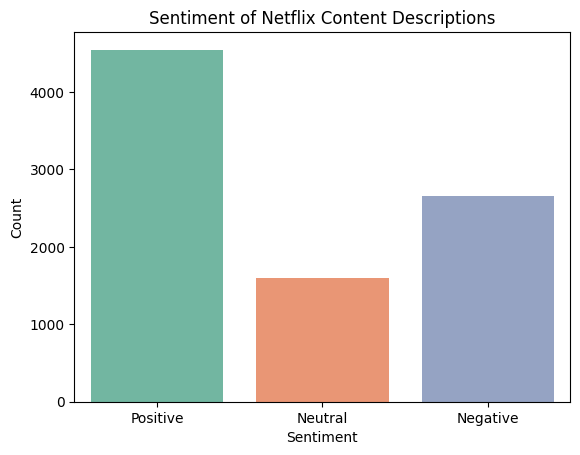

In [20]:
from textblob import TextBlob

def get_sentiment(text):
    polarity = TextBlob(str(text)).sentiment.polarity
    if polarity > 0:
        return 'Positive'
    elif polarity < 0:
        return 'Negative'
    else:
        return 'Neutral'

df['sentiment'] = df['description'].apply(get_sentiment)

# Sentiment distribution
sns.countplot(data=df, x='sentiment', palette='Set2')
plt.title('Sentiment of Netflix Content Descriptions')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

In [4]:
import sys
print(sys.executable)

C:\Users\akash\AppData\Local\Programs\Python\Python312\python.exe


In [5]:
!{sys.executable} -m pip install textblob

  Using cached textblob-0.19.0-py3-none-any.whl.metadata (4.4 kB)
  Using cached nltk-3.9.1-py3-none-any.whl.metadata (2.9 kB)
  Using cached joblib-1.5.1-py3-none-any.whl.metadata (5.6 kB)
Using cached textblob-0.19.0-py3-none-any.whl (624 kB)
Using cached nltk-3.9.1-py3-none-any.whl (1.5 MB)
Using cached joblib-1.5.1-py3-none-any.whl (307 kB)



[notice] A new release of pip is available: 24.2 -> 25.1.1
[notice] To update, run: C:\Users\akash\AppData\Local\Programs\Python\Python312\python.exe -m pip install --upgrade pip


# Step 5

🧠 Step 5: Insights & Next Steps
Key Findings:
- Most content is TV-MA, indicating mature audiences.
- Movies dominate over TV Shows.
- USA, India, UK lead in content production.
- Sentiment analysis shows a majority of content descriptions are positive.
Project Extensions:
- 📌 Genre popularity over time
- 📌 Top directors and actors
- 📌 Build a recommendation system
- 📌 Create an interactive dashboard using Streamlit or Plotl
